# 1. t-SNE visualization

In [1]:
# TSNE preserves the intra cluster distances and not the inter cluster distances 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

In [3]:
# define the centers of each Gaussian cloud
centers = np.array([
[ 1,  1,  1],
[ 1,  1, -1],
[ 1, -1,  1],
[ 1, -1, -1],
[-1,  1,  1],
[-1,  1, -1],
[-1, -1,  1],
[-1, -1, -1],
])*3

In [4]:
centers

array([[ 3,  3,  3],
       [ 3,  3, -3],
       [ 3, -3,  3],
       [ 3, -3, -3],
       [-3,  3,  3],
       [-3,  3, -3],
       [-3, -3,  3],
       [-3, -3, -3]])

In [5]:
# create the clouds, Gaussian samples centered at
# each of the centers we just made
data = []
pts_per_cloud = 100
for c in centers:
    cloud = np.random.randn(pts_per_cloud, 3) + c
    data.append(cloud)

# converts the list into numpy array - utility
data = np.concatenate(data)

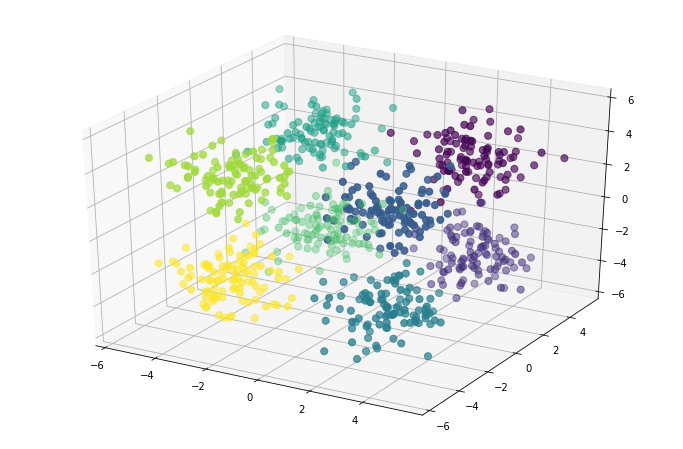

In [6]:
# visualize the clouds in 3-D
# add colors / labels so we can track where the points go
colors = np.array([[i]*pts_per_cloud for i in range(len(centers))]).flatten()
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:,0], data[:,1], data[:,2], c=colors, s=50)
plt.show()

In [7]:
# perform dimensionality reduction
tsne = TSNE()
transformed = tsne.fit_transform(data)

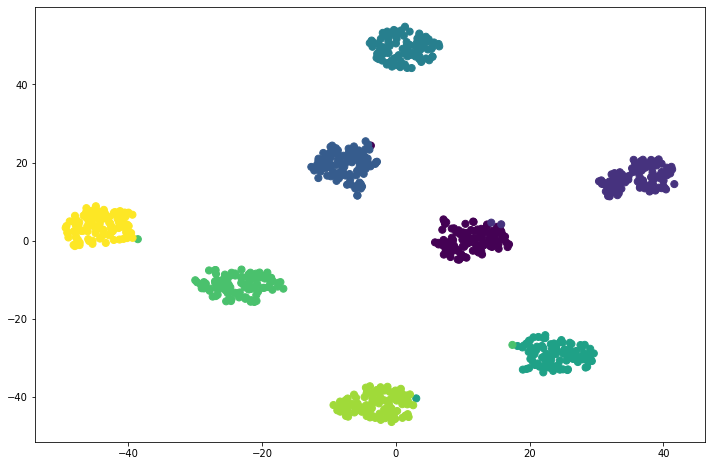

In [8]:
plt.figure(figsize=(12, 8))
plt.scatter(transformed[:, 0], transformed[:, 1], c=colors, s=50)
plt.show()

# 2. t-SNE on Donut 

In [9]:
def get_donut_data():
    N = 600
    R_inner = 10
    R_outer = 20

    # distance from origin is radius + random normal
    # angle theta is uniformly distributed between (0, 2pi)
    R1 = np.random.randn(N//2) + R_inner
    theta = 2*np.pi*np.random.random(N//2)
    X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

    R2 = np.random.randn(N//2) + R_outer
    theta = 2*np.pi*np.random.random(N//2)
    X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

    X = np.concatenate([ X_inner, X_outer ])
    Y = np.array([0]*(N//2) + [1]*(N//2))
    return X, Y

In [10]:
X, Y = get_donut_data()

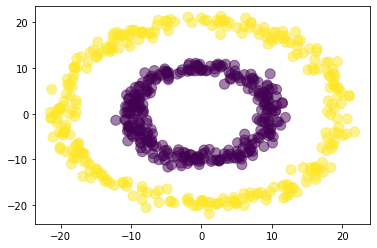

In [11]:
plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

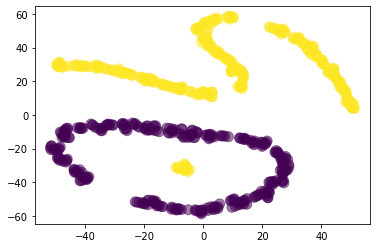

In [12]:
tsne = TSNE(perplexity=10)
Z = tsne.fit_transform(X)
plt.scatter(Z[:,0], Z[:,1], s=100, c=Y, alpha=0.5)
plt.show()

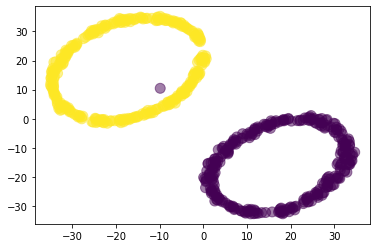

In [13]:
tsne = TSNE(perplexity=20)
Z = tsne.fit_transform(X)
plt.scatter(Z[:,0], Z[:,1], s=100, c=Y, alpha=0.5)
plt.show()

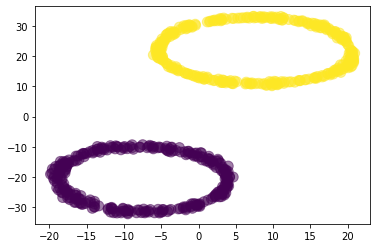

In [14]:
tsne = TSNE(perplexity=30)
Z = tsne.fit_transform(X)
plt.scatter(Z[:,0], Z[:,1], s=100, c=Y, alpha=0.5)
plt.show()

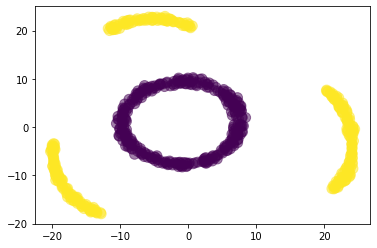

In [15]:
tsne = TSNE(perplexity=40)
Z = tsne.fit_transform(X)
plt.scatter(Z[:,0], Z[:,1], s=100, c=Y, alpha=0.5)
plt.show()

# 3. t-SNE on XOR

In [16]:
def get_xor_data():
    X1 = np.random.random((100, 2))
    X2 = np.random.random((100, 2)) - np.array([1, 1])
    X3 = np.random.random((100, 2)) - np.array([1, 0])
    X4 = np.random.random((100, 2)) - np.array([0, 1])
    X = np.vstack((X1, X2, X3, X4))
    Y = np.array([0]*200 + [1]*200)
    return X, Y

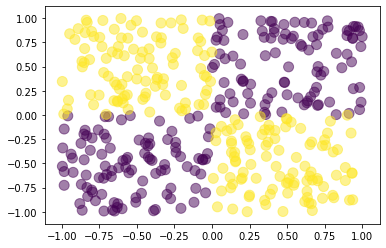

In [17]:
X, Y = get_xor_data()

plt.scatter(X[:,0], X[:,1], s=100, c=Y, alpha=0.5)
plt.show()

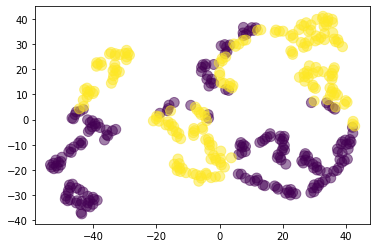

In [18]:
tsne = TSNE(perplexity=10)
Z = tsne.fit_transform(X)
plt.scatter(Z[:,0], Z[:,1], s=100, c=Y, alpha=0.5)
plt.show()

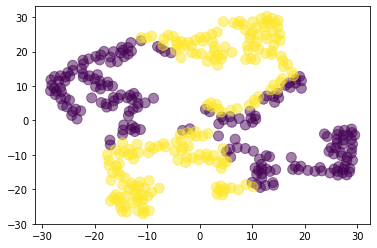

In [19]:
tsne = TSNE(perplexity=20)
Z = tsne.fit_transform(X)
plt.scatter(Z[:,0], Z[:,1], s=100, c=Y, alpha=0.5)
plt.show()

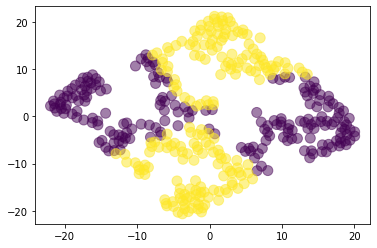

In [20]:
tsne = TSNE(perplexity=30)
Z = tsne.fit_transform(X)
plt.scatter(Z[:,0], Z[:,1], s=100, c=Y, alpha=0.5)
plt.show()

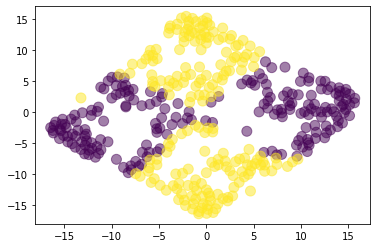

In [21]:
tsne = TSNE(perplexity=40)
Z = tsne.fit_transform(X)
plt.scatter(Z[:,0], Z[:,1], s=100, c=Y, alpha=0.5)
plt.show()

# 4. t-SNE on MNIST

In [22]:
data = pd.read_csv("../unsupervised_learning_clustering_part1/data/mnist_train.csv")

In [23]:
X = data.iloc[:2000, 1:].values
y = data.iloc[:2000, 0].values

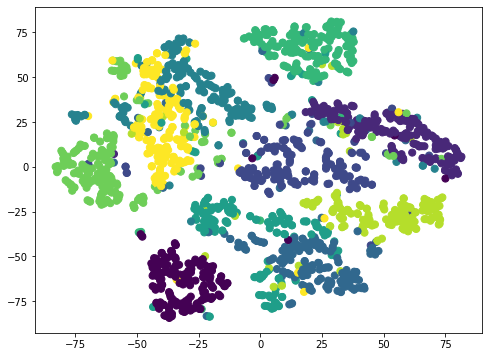

In [29]:
tsne = TSNE(perplexity=10)
transformed = tsne.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(transformed[:, 0], transformed[:, 1], c=y, s=50)
plt.show()

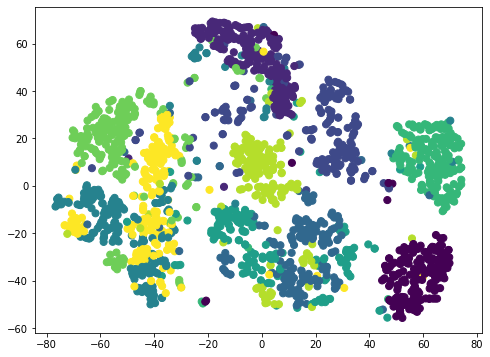

In [30]:
tsne = TSNE(perplexity=20)
transformed = tsne.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(transformed[:, 0], transformed[:, 1], c=y, s=50)
plt.show()

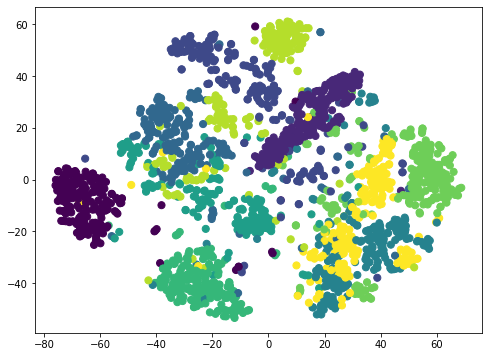

In [31]:
tsne = TSNE(perplexity=30)
transformed = tsne.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(transformed[:, 0], transformed[:, 1], c=y, s=50)
plt.show()

(2000, 2)


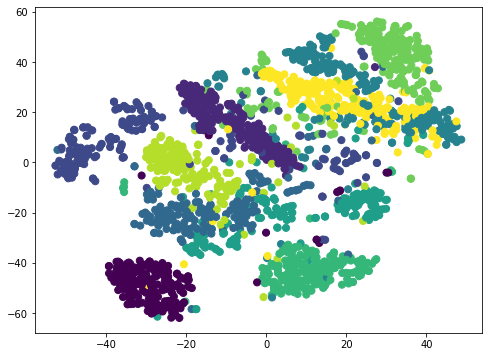

In [50]:
tsne = TSNE(perplexity=40)
transformed = tsne.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(transformed[:, 0], transformed[:, 1], c=y, s=50)
plt.show()

In [33]:
def purity(Y, R):
    # maximum purity is 1, higher is better
    N, K = R.shape
    p = 0
    for k in range(K):
        best_target = -1 # we don't strictly need to store this
        max_intersection = 0
        for j in range(K):
            intersection = R[Y==j, k].sum()
            if intersection > max_intersection:
                max_intersection = intersection
                best_target = j
        p += max_intersection
    return p / N

In [34]:
# purity measure from unsupervised machine learning pt 1
# maximum purity is 1, higher is better
gmm = GaussianMixture(n_components=10)
gmm.fit(X)
Rfull = gmm.predict_proba(X)
print("Rfull.shape:", Rfull.shape)
print("full purity:", purity(y, Rfull))

Rfull.shape: (2000, 10)
full purity: 0.5485


In [49]:
y.shape, Rfull.shape, transformed.shape

((2000,), (2000, 10), (400, 10))

In [52]:
# now try the same thing on the reduced data
gmm.fit(transformed)
r_reduced = gmm.predict_proba(transformed)
# print("reduced purity:", purity(transformed, r_reduced))

In [54]:
# NOTE: we cant apply the tsne model once learnt, to new data ----------- why ?

# 5. t-SNE on book titles

In [63]:
import nltk
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.manifold import TSNE

In [64]:
wordnet_lemmatizer = WordNetLemmatizer()

titles = [line.rstrip() for line in open('../unsupervised_learning_clustering_part1/data/all_book_titles.txt')]

# copy tokenizer from sentiment example
stopwords = set(w.rstrip() for w in open('../unsupervised_learning_clustering_part1/data/stopwords.txt'))
# add more stopwords specific to this problem
stopwords = stopwords.union({
    'introduction', 'edition', 'series', 'application',
    'approach', 'card', 'access', 'package', 'plus', 'etext',
    'brief', 'vol', 'fundamental', 'guide', 'essential', 'printed',
    'third', 'second', 'fourth', })

In [65]:
def my_tokenizer(s):
    s = s.lower() # downcase
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) > 2] # remove short words, they're probably not useful
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove any digits, i.e. "3rd edition"
    return tokens


In [66]:
# create a word-to-index map so that we can create our word-frequency vectors later
# let's also save the tokenized versions so we don't have to tokenize again later
word_index_map = {}
current_index = 0
all_tokens = []
all_titles = []
index_word_map = []
for title in titles:
    try:
        title = title.encode('ascii', 'ignore') # this will throw exception if bad characters
        title = title.decode('utf-8')
        all_titles.append(title)
        tokens = my_tokenizer(title)
        all_tokens.append(tokens)
        for token in tokens:
            if token not in word_index_map:
                word_index_map[token] = current_index
                current_index += 1
                index_word_map.append(token)
    except Exception as e:
        print(e)

In [67]:
# now let's create our input matrices - just indicator variables for this example - works better than proportions
def tokens_to_vector(tokens):
    x = np.zeros(len(word_index_map))
    for t in tokens:
        i = word_index_map[t]
        x[i] = 1
    return x

In [68]:
N = len(all_tokens)
D = len(word_index_map)
X = np.zeros((D, N)) # terms will go along rows, documents along columns
i = 0
for tokens in all_tokens:
    X[:,i] = tokens_to_vector(tokens)
    i += 1
print("X.shape:", X.shape)

X.shape: (2069, 2373)


In [71]:
tsne = TSNE(perplexity=40)
Z = tsne.fit_transform(X)

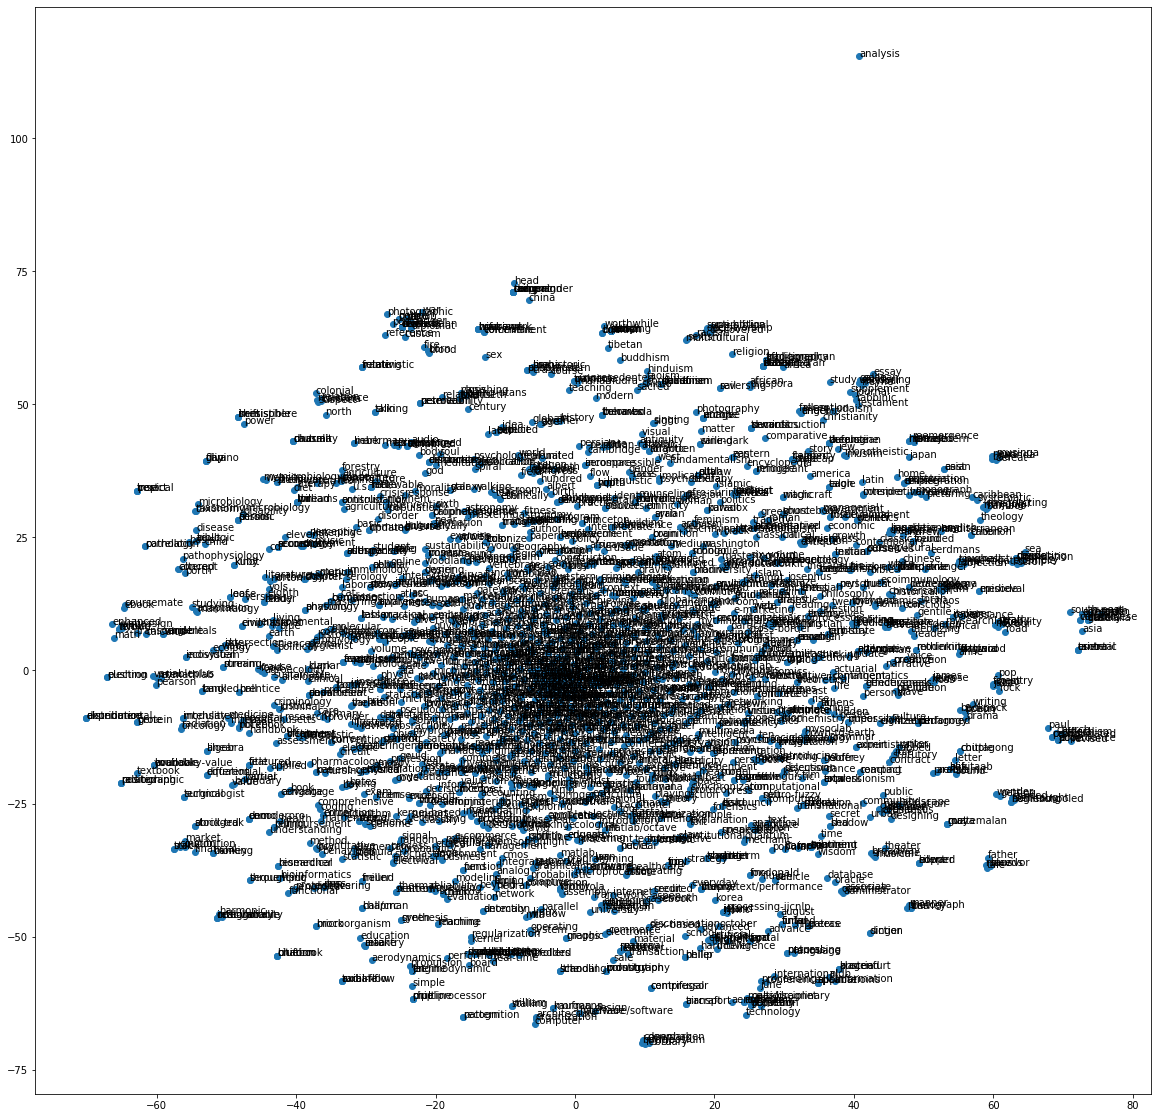

In [72]:
plt.figure(figsize=(20, 20))
plt.scatter(Z[:,0], Z[:,1])

for i in range(D):
    plt.annotate(s=index_word_map[i], xy=(Z[i,0], Z[i,1]))
plt.show()